In [1]:
import nltk
import spacy

nlp = spacy.load('en')

In [2]:
%%python
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
text = """Each autumn, businesses flock to elite universities like Harvard and Stanford to recruit engineers for their first post-university jobs. Curious students pile into classrooms to hear recruiters deliver their best pitches. These are the first moments when prospective employees size up a company’s culture and assess whether they can see themselves reflected in its future."""

## Tokenization

### Sentence Tokenization

##### Using spaCy

In [4]:
doc = nlp(text)

In [5]:
#sentence spans (an iterable object, like a list, of tokens) are available via the sents attribute
for index, sent in enumerate(doc.sents):
    print(index, type(sent), sent, '\n')

0 <class 'spacy.tokens.span.Span'> Each autumn, businesses flock to elite universities like Harvard and Stanford to recruit engineers for their first post-university jobs. 

1 <class 'spacy.tokens.span.Span'> Curious students pile into classrooms to hear recruiters deliver their best pitches. 

2 <class 'spacy.tokens.span.Span'> These are the first moments when prospective employees size up a company’s culture and assess whether they can see themselves reflected in its future. 



In [6]:
spacy_sents = list(doc.sents)

##### Using NLTK

In [7]:
from nltk import sent_tokenize

In [8]:
for index, sent in enumerate(sent_tokenize(text)):
    print(index, type(sent), sent, '\n')

0 <class 'str'> Each autumn, businesses flock to elite universities like Harvard and Stanford to recruit engineers for their first post-university jobs. 

1 <class 'str'> Curious students pile into classrooms to hear recruiters deliver their best pitches. 

2 <class 'str'> These are the first moments when prospective employees size up a company’s culture and assess whether they can see themselves reflected in its future. 



In [9]:
nltk_sents = sent_tokenize(text)

### Word Tokenization

##### spaCy

In [10]:
for index, token in enumerate(spacy_sents[0]):
    print(index, type(token), token)

0 <class 'spacy.tokens.token.Token'> Each
1 <class 'spacy.tokens.token.Token'> autumn
2 <class 'spacy.tokens.token.Token'> ,
3 <class 'spacy.tokens.token.Token'> businesses
4 <class 'spacy.tokens.token.Token'> flock
5 <class 'spacy.tokens.token.Token'> to
6 <class 'spacy.tokens.token.Token'> elite
7 <class 'spacy.tokens.token.Token'> universities
8 <class 'spacy.tokens.token.Token'> like
9 <class 'spacy.tokens.token.Token'> Harvard
10 <class 'spacy.tokens.token.Token'> and
11 <class 'spacy.tokens.token.Token'> Stanford
12 <class 'spacy.tokens.token.Token'> to
13 <class 'spacy.tokens.token.Token'> recruit
14 <class 'spacy.tokens.token.Token'> engineers
15 <class 'spacy.tokens.token.Token'> for
16 <class 'spacy.tokens.token.Token'> their
17 <class 'spacy.tokens.token.Token'> first
18 <class 'spacy.tokens.token.Token'> post
19 <class 'spacy.tokens.token.Token'> -
20 <class 'spacy.tokens.token.Token'> university
21 <class 'spacy.tokens.token.Token'> jobs
22 <class 'spacy.tokens.token.Token

##### NLTK

In [11]:
from nltk import word_tokenize

In [12]:
for index, token in enumerate(word_tokenize(nltk_sents[0])):
    print(index, type(token), token)

0 <class 'str'> Each
1 <class 'str'> autumn
2 <class 'str'> ,
3 <class 'str'> businesses
4 <class 'str'> flock
5 <class 'str'> to
6 <class 'str'> elite
7 <class 'str'> universities
8 <class 'str'> like
9 <class 'str'> Harvard
10 <class 'str'> and
11 <class 'str'> Stanford
12 <class 'str'> to
13 <class 'str'> recruit
14 <class 'str'> engineers
15 <class 'str'> for
16 <class 'str'> their
17 <class 'str'> first
18 <class 'str'> post-university
19 <class 'str'> jobs
20 <class 'str'> .


In [13]:
nltk_tokens = word_tokenize(nltk_sents[0])

##### using Regular Expressions (regex)

In [14]:
import re

In [15]:
WORDS_RE = re.compile(r'\W+')

In [16]:
for index, token in enumerate(re.split(WORDS_RE, nltk_sents[0])):
    print(index, type(token), token)

0 <class 'str'> Each
1 <class 'str'> autumn
2 <class 'str'> businesses
3 <class 'str'> flock
4 <class 'str'> to
5 <class 'str'> elite
6 <class 'str'> universities
7 <class 'str'> like
8 <class 'str'> Harvard
9 <class 'str'> and
10 <class 'str'> Stanford
11 <class 'str'> to
12 <class 'str'> recruit
13 <class 'str'> engineers
14 <class 'str'> for
15 <class 'str'> their
16 <class 'str'> first
17 <class 'str'> post
18 <class 'str'> university
19 <class 'str'> jobs
20 <class 'str'> 


But we lost the punctuation and we have emtpy strings.

In [17]:
WORDS_AND_PUNCT_RE = re.compile(r'\w+|[\,\.\!\?\-]')

In [18]:
for index, token in enumerate(re.findall(WORDS_AND_PUNCT_RE, nltk_sents[0])):
    print(index, type(token), token)

0 <class 'str'> Each
1 <class 'str'> autumn
2 <class 'str'> ,
3 <class 'str'> businesses
4 <class 'str'> flock
5 <class 'str'> to
6 <class 'str'> elite
7 <class 'str'> universities
8 <class 'str'> like
9 <class 'str'> Harvard
10 <class 'str'> and
11 <class 'str'> Stanford
12 <class 'str'> to
13 <class 'str'> recruit
14 <class 'str'> engineers
15 <class 'str'> for
16 <class 'str'> their
17 <class 'str'> first
18 <class 'str'> post
19 <class 'str'> -
20 <class 'str'> university
21 <class 'str'> jobs
22 <class 'str'> .


See [this tutorial](https://www.datacamp.com/community/tutorials/python-regular-expression-tutorial) to learn more about regular expressions and visit [pythex.org](www.pythex.org) to play around.

# Part of Speech (POS) Tagging

##### spaCy

The best part about spaCy is it does everything for you right out of the box

In [19]:
[(t, t.pos_, t.tag_) for t in spacy_sents[0]]

[(Each, 'DET', 'DT'),
 (autumn, 'NOUN', 'NN'),
 (,, 'PUNCT', ','),
 (businesses, 'NOUN', 'NNS'),
 (flock, 'NOUN', 'NN'),
 (to, 'ADP', 'IN'),
 (elite, 'ADJ', 'JJ'),
 (universities, 'NOUN', 'NNS'),
 (like, 'ADP', 'IN'),
 (Harvard, 'PROPN', 'NNP'),
 (and, 'CCONJ', 'CC'),
 (Stanford, 'PROPN', 'NNP'),
 (to, 'PART', 'TO'),
 (recruit, 'VERB', 'VB'),
 (engineers, 'NOUN', 'NNS'),
 (for, 'ADP', 'IN'),
 (their, 'ADJ', 'PRP$'),
 (first, 'ADJ', 'JJ'),
 (post, 'NOUN', 'NN'),
 (-, 'PUNCT', 'HYPH'),
 (university, 'NOUN', 'NN'),
 (jobs, 'NOUN', 'NNS'),
 (., 'PUNCT', '.')]

[Meaning of the POS Labels and Tags](https://spacy.io/api/annotation#section-pos-tagging)
See the English section.

##### NLTK

In [20]:
nltk.pos_tag(nltk_tokens)

[('Each', 'DT'),
 ('autumn', 'NN'),
 (',', ','),
 ('businesses', 'NNS'),
 ('flock', 'VBP'),
 ('to', 'TO'),
 ('elite', 'VB'),
 ('universities', 'NNS'),
 ('like', 'IN'),
 ('Harvard', 'NNP'),
 ('and', 'CC'),
 ('Stanford', 'NNP'),
 ('to', 'TO'),
 ('recruit', 'VB'),
 ('engineers', 'NNS'),
 ('for', 'IN'),
 ('their', 'PRP$'),
 ('first', 'JJ'),
 ('post-university', 'NN'),
 ('jobs', 'NNS'),
 ('.', '.')]

# Word Normalization: Stemming and Lemmatization
[Read more](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

##### spaCy

spaCy doesn't support stemming, but lemmatization (like everything else) is already built in.

In [21]:
[(t, 'LEMMA:', t.lemma_) for t in spacy_sents[0]]

[(Each, 'LEMMA:', 'each'),
 (autumn, 'LEMMA:', 'autumn'),
 (,, 'LEMMA:', ','),
 (businesses, 'LEMMA:', 'business'),
 (flock, 'LEMMA:', 'flock'),
 (to, 'LEMMA:', 'to'),
 (elite, 'LEMMA:', 'elite'),
 (universities, 'LEMMA:', 'university'),
 (like, 'LEMMA:', 'like'),
 (Harvard, 'LEMMA:', 'harvard'),
 (and, 'LEMMA:', 'and'),
 (Stanford, 'LEMMA:', 'stanford'),
 (to, 'LEMMA:', 'to'),
 (recruit, 'LEMMA:', 'recruit'),
 (engineers, 'LEMMA:', 'engineer'),
 (for, 'LEMMA:', 'for'),
 (their, 'LEMMA:', '-PRON-'),
 (first, 'LEMMA:', 'first'),
 (post, 'LEMMA:', 'post'),
 (-, 'LEMMA:', '-'),
 (university, 'LEMMA:', 'university'),
 (jobs, 'LEMMA:', 'job'),
 (., 'LEMMA:', '.')]

##### NLTK

NLTK has multiple stemmers that you can use.

In [22]:
from nltk.stem import LancasterStemmer, PorterStemmer, SnowballStemmer

In [23]:
lancaster_stem = LancasterStemmer()
porter_stem = PorterStemmer()
snowball_stem = SnowballStemmer('english')

In [24]:
for token in nltk_tokens:
    print('token: {} ---  Lancaster: {}  |  Porter: {}  |  Snowball: {}'.format(token, lancaster_stem.stem(token), porter_stem.stem(token), snowball_stem.stem(token)))

token: Each ---  Lancaster: each  |  Porter: each  |  Snowball: each
token: autumn ---  Lancaster: autumn  |  Porter: autumn  |  Snowball: autumn
token: , ---  Lancaster: ,  |  Porter: ,  |  Snowball: ,
token: businesses ---  Lancaster: busy  |  Porter: busi  |  Snowball: busi
token: flock ---  Lancaster: flock  |  Porter: flock  |  Snowball: flock
token: to ---  Lancaster: to  |  Porter: to  |  Snowball: to
token: elite ---  Lancaster: elit  |  Porter: elit  |  Snowball: elit
token: universities ---  Lancaster: univers  |  Porter: univers  |  Snowball: univers
token: like ---  Lancaster: lik  |  Porter: like  |  Snowball: like
token: Harvard ---  Lancaster: harvard  |  Porter: harvard  |  Snowball: harvard
token: and ---  Lancaster: and  |  Porter: and  |  Snowball: and
token: Stanford ---  Lancaster: stanford  |  Porter: stanford  |  Snowball: stanford
token: to ---  Lancaster: to  |  Porter: to  |  Snowball: to
token: recruit ---  Lancaster: recruit  |  Porter: recruit  |  Snowball:

# Analyzing Sentence Structure

There are two main approaches to analyzing sentence structure: Dependency-based and Constituency-based<br>
From [Wikipedia](https://en.wikipedia.org/wiki/Dependency_grammar#Dependency_vs._constituency):<br>
"Dependency is a one-to-one correspondence: for every element (e.g. word or morph) in the sentence, there is exactly one node in the structure of that sentence that corresponds to that element. The result of this one-to-one correspondence is that dependency grammars are word (or morph) grammars. All that exist are the elements and the dependencies that connect the elements into a structure. This situation should be compared with the constituency relation of phrase structure grammars. Constituency is a one-to-one-or-more correspondence, which means that, for every element in a sentence, there are one or more nodes in the structure that correspond to that element. The result of this difference is that dependency structures are minimal[7] compared to their constituency structure counterparts, since they tend to contain much fewer nodes."

##### spaCy

spaCy supports dependency parsing for analyzing sentence structure.

In [25]:
# already built in
[(t, t.dep_, t.head) for t in spacy_sents[0]]

[(Each, 'det', autumn),
 (autumn, 'npadvmod', flock),
 (,, 'punct', flock),
 (businesses, 'nsubj', flock),
 (flock, 'ROOT', flock),
 (to, 'aux', elite),
 (elite, 'advcl', flock),
 (universities, 'dobj', elite),
 (like, 'prep', universities),
 (Harvard, 'pobj', like),
 (and, 'cc', Harvard),
 (Stanford, 'conj', Harvard),
 (to, 'aux', recruit),
 (recruit, 'xcomp', elite),
 (engineers, 'dobj', recruit),
 (for, 'prep', engineers),
 (their, 'poss', jobs),
 (first, 'amod', jobs),
 (post, 'compound', university),
 (-, 'punct', university),
 (university, 'compound', jobs),
 (jobs, 'pobj', for),
 (., 'punct', flock)]

In [26]:
from spacy import displacy

In [27]:
# you can convert a sentence Span object to a doc like this
sent_span = spacy_sents[0]
print(type(sent_span))
sent_doc = sent_span.as_doc()

<class 'spacy.tokens.span.Span'>


In [28]:
displacy.render(sent_doc, style='dep', jupyter=True, options={'distance': 120})

/Users/zacharywentzell/anaconda3/envs/nlp/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)
/Users/zacharywentzell/anaconda3/envs/nlp/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)
/Users/zacharywentzell/anaconda3/envs/nlp/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)


##### NLTK

NLTK can perform both types. However, they require you to define your own grammars, which is outside of the scope of this course. NLTK also provides support for using Stanford's CoreNLP software to perform both dependency and constituency parsing. However for dependency parsing, just stick with spaCy. It's faster and one of the best.

In [29]:
from nltk.parse.stanford import StanfordDependencyParser, StanfordParser

If you don't have a JAVAHOME environment variable set on your machine. You'll need to set it from your script.<br>
To determine the path to java on your machine<br>
Windows: Go to the command prompt and type `where java`<br>
OSX/Linux: Open the console and type: `which java`

In [30]:
import os

java_path = '/usr/bin/java'
os.environ['JAVAHOME'] = java_path

path_to_jar = "/Users/zacharywentzell/Downloads/stanford-corenlp-full-2017-06-09/stanford-corenlp-3.8.0-sources.jar"
path_to_models = "/Users/zacharywentzell/Downloads/stanford-corenlp-full-2017-06-09/stanford-corenlp-3.8.0-models.jar"

In [31]:
scp = StanfordParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models)

In [32]:
test_sent = "Al Norman has been fighting to keep Walmart and other big-box retailers out of small towns like this one for 25 years."

In [33]:
parse_tree = list(scp.raw_parse(test_sent))[0]

if you want to be able to display the following tree in jupyter, you need to install ghostscript<br>
For Mac:<br>
`brew install ghostsript` or `conda install -c conda-forge ghostscript`<br><br>
For Windows:<br>
You'll need to download and install [ghostscript from here](https://www.ghostscript.com/download/gsdnld.html)<br>
Then you have to make sure ghostscript is in your PATH by adding the folder `C:\Program Files\gs\gs9.22\bin` (or something similar)

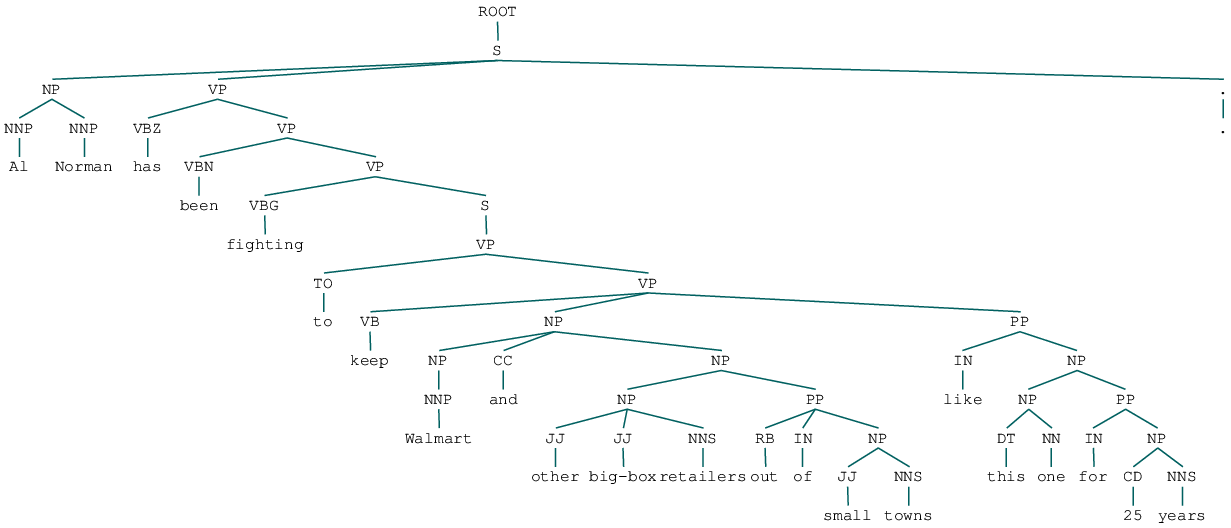

In [38]:
parse_tree

In [39]:
print(parse_tree)

(ROOT
  (S
    (NP (NNP Al) (NNP Norman))
    (VP
      (VBZ has)
      (VP
        (VBN been)
        (VP
          (VBG fighting)
          (S
            (VP
              (TO to)
              (VP
                (VB keep)
                (NP
                  (NP (NNP Walmart))
                  (CC and)
                  (NP
                    (NP (JJ other) (JJ big-box) (NNS retailers))
                    (PP (RB out) (IN of) (NP (JJ small) (NNS towns)))))
                (PP
                  (IN like)
                  (NP
                    (NP (DT this) (NN one))
                    (PP (IN for) (NP (CD 25) (NNS years)))))))))))
    (. .)))


In [48]:
# this is the number of child nodes, 1: (S ...)
len(parse_tree)

1

In [51]:
subtrees = list(parse_tree.subtrees())

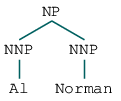

In [55]:
subtrees[2]

In [56]:
sdp = StanfordDependencyParser(path_to_jar=path_to_jar, path_to_models_jar=path_to_models)

In [60]:
parse_tree = list(sdp.parse(word_tokenize(test_sent)))[0]

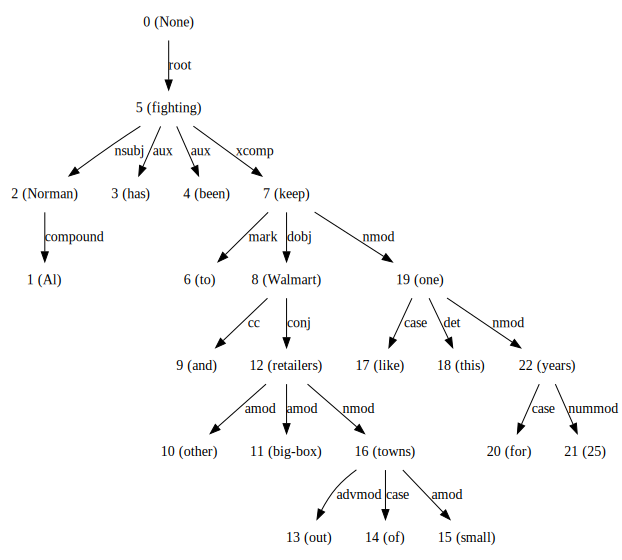

In [61]:
parse_tree

# Noun Phrases (Chunks)

##### spaCy

In [81]:
doc = nlp(test_sent)
list(doc.noun_chunks)

[Al Norman, Walmart, other big-box retailers, small towns, this one, 25 years]

##### NLTK

In [67]:
parse_tree = list(scp.raw_parse(test_sent))[0]

In [92]:
[(' '.join(tree.leaves()), len(list(tree.subtrees(filter=lambda t: t.label() == 'NP')))) for tree in parse_tree.subtrees(filter=lambda t: t.label() == 'NP') if len(list(tree.subtrees(filter=lambda t: t.label() == 'NP'))) == 1]

[('Al Norman', 1),
 ('Walmart', 1),
 ('other big-box retailers', 1),
 ('small towns', 1),
 ('this one', 1),
 ('25 years', 1)]

# Named Entities
Apply categorical labels to sequences of tokens (such as proper nouns) that represent different types of entities: such as people, places, organizations, etc. The categories can be whatever you want them to be if you build your own Named Entity Recognitino (NER) model. If you use someone else's model, you have to use the categories/labels that they trained the model to recognize. And the model will only be as good as the data it was trained on. Meaning if you try to use a pretrained model on text that is very different from the text it was trained on, you may not get very good results.

##### spaCy
[See here for more info on the entity types spaCy's models are trained to recognize](https://spacy.io/api/annotation#section-named-entities)

In [121]:
test_sent = 'FC Bayern was founded in 1900 by eleven football players led by Franz John.'

In [123]:
doc = nlp(test_sent)

In [124]:
[(e, e.label_) for e in doc.ents]

[(FC Bayern, 'ORG'),
 (1900, 'DATE'),
 (eleven, 'CARDINAL'),
 (Franz John, 'PERSON')]

In [125]:
# Also notice that all tokens in a Doc/Span have entity types as well.
[(t, t.ent_type_) for t in doc]

[(FC, 'ORG'),
 (Bayern, 'ORG'),
 (was, ''),
 (founded, ''),
 (in, ''),
 (1900, 'DATE'),
 (by, ''),
 (eleven, 'CARDINAL'),
 (football, ''),
 (players, ''),
 (led, ''),
 (by, ''),
 (Franz, 'PERSON'),
 (John, 'PERSON'),
 (., '')]

##### NLTK

In [126]:
tokens = word_tokenize('FC Bayern was founded in 1900 by eleven football players led by Franz John.')


In [127]:
tagged_tokens = nltk.pos_tag(tokens)

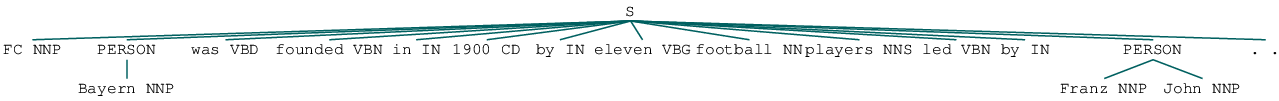

In [128]:
named_entity_chunks = nltk.ne_chunk(tagged_tokens)
named_entity_chunks

In [133]:
[(ne.label(), ' '.join(leaf[0] for leaf in ne.leaves())) for ne in named_entity_chunks if hasattr(ne, 'label')]

[('PERSON', 'Bayern'), ('PERSON', 'Franz John')]

# Extracting Phrases/Chunks (an example)

##### only spaCy

### prepositional phrases

In [147]:
text = """Bayern Munich, or FC Bayern, is a German sports club based in Munich, Bavaria, Germany. It is best known for its professional football team, which plays in the Bundesliga, the top tier of the German football league system, and is the most successful club in German football history, having won a record 26 national titles and 18 national cups. FC Bayern was founded in 1900 by eleven football players led by Franz John. Although Bayern won its first national championship in 1932, the club was not selected for the Bundesliga at its inception in 1963. The club had its period of greatest success in the middle of the 1970s when, under the captaincy of Franz Beckenbauer, it won the European Cup three times in a row (1974-76). Overall, Bayern has reached ten UEFA Champions League finals, most recently winning their fifth title in 2013 as part of a continental treble."""

In [148]:
doc = nlp(text)

In [149]:
prep_objs = [token for token in doc if token.dep_ == 'pobj']
prep_objs[:5]

[Munich, team, Bundesliga, system, history]

In [152]:
for prep_obj in prep_objs:
    prep = prep_obj.head
    phrase = doc[prep.i:prep_obj.i + 1]
    print(prep, prep_obj, '---', phrase, '   ', type(phrase))

in Munich --- in Munich     <class 'spacy.tokens.span.Span'>
for team --- for its professional football team     <class 'spacy.tokens.span.Span'>
in Bundesliga --- in the Bundesliga     <class 'spacy.tokens.span.Span'>
of system --- of the German football league system     <class 'spacy.tokens.span.Span'>
in history --- in German football history     <class 'spacy.tokens.span.Span'>
in 1900 --- in 1900     <class 'spacy.tokens.span.Span'>
by players --- by eleven football players     <class 'spacy.tokens.span.Span'>
by John --- by Franz John     <class 'spacy.tokens.span.Span'>
in 1932 --- in 1932     <class 'spacy.tokens.span.Span'>
for Bundesliga --- for the Bundesliga     <class 'spacy.tokens.span.Span'>
at inception --- at its inception     <class 'spacy.tokens.span.Span'>
in 1963 --- in 1963     <class 'spacy.tokens.span.Span'>
of success --- of greatest success     <class 'spacy.tokens.span.Span'>
in middle --- in the middle     <class 'spacy.tokens.span.Span'>
of 1970s --- of th

# Other tasks

spaCy can't do everything. Stanford's CoreNLP project can help fill in some of the gaps.

## Coreference Resolution

Figure out which terms reference each other in a sentence<br>
<br>
This is extremely helpful for figuring out what pronouns are referencing when you are trying to extract information from text.

In [156]:
text = """Barack Obama was born in Hawaii.  He is the president. Obama was elected in 2008."""

In [154]:
from pycorenlp import StanfordCoreNLP

In [155]:
# first start the CoreNLP server by running
# java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000

corenlp = StanfordCoreNLP('http://localhost:9000')

In [158]:
# the first run, and any runs where you change annotators is slow
results = corenlp.annotate(text, properties={'annotators': 'ssplit, tokenize, coref',
                                             'coref.algorithm': 'statistical',
                                             'outputFormat': 'json'
                                            })

In [159]:
results.keys()

dict_keys(['sentences', 'corefs'])

In [161]:
for coref_id, corefs in results['corefs'].items():
    for coref in corefs:
        print(coref['text'])

Barack Obama
He
Obama


# Other Modules to Check Out

- [Textacy](https://github.com/chartbeat-labs/textacy)
- [Textblob](http://textblob.readthedocs.io/en/dev/)
- [Pattern](https://github.com/clips/pattern)
- [Stanford CoreNLP](https://stanfordnlp.github.io/CoreNLP/index.html) via [pycorenlp](https://github.com/smilli/py-corenlp)

# References

Dipanjan Sarkar. 2016. Text Analytics with Python: A Practical Real-World Approach to Gaining Actionable Insights from Your Data (1st ed.). Apress, Berkely, CA, USA. 